## Import Packages 

In [1]:
from spo.data import knapsack, dataset
from spo.model import knapsackModel
from spo.twostage import sklearnPred
from spo.eval import calUnambSPO

In [2]:
import time
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from tqdm import tqdm

## Init Data

In [3]:
# generate data for grid network (features and costs)
m = 48 # number of items
n = 1000 # number of data
p = 5 # size of feature
deg = 4 # polynomial degree
weights, x, c = knapsack.genData(n+1000, p, m, deg=deg, cor=False)

## Build Optimizer

In [4]:
# model for shortest path
cap = 30
ks_model = knapsackModel(weights, cap)


--------------------------------------------
--------------------------------------------

Academic license - for non-commercial use only - expires 2021-06-13
Using license file C:\Users\Apocrypse\gurobi.lic


## Build Predictor

In [5]:
# linear regression
lr = LinearRegression()
lr_twostage = sklearnPred(lr, ks_model)

In [6]:
# random forest
rf = RandomForestRegressor(random_state=135)

## Experiments

### Training Set Size = 100, Noise Half−width = 0 

In [7]:
# set up
n = 100 # number of data
p = 5 # size of feature
e = 0 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [8]:
# init DataFrame
df1_lr = pd.DataFrame(columns = degs)
df1_rf = pd.DataFrame(columns = degs)

In [9]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        weights, x, c = knapsack.genData(n+1000, p, m, deg=deg, noise_width=e, seed=i)
        c = - c
        # optmization model
        ks_model = knapsackModel(weights, cap)
        # two stage model
        lr_twostage = sklearnPred(lr, ks_model)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        ks_dataset_train = dataset.optDataset(ks_model, x_train, c_train)
        ks_dataset_test = dataset.optDataset(ks_model, x_test, c_test)
        # training
        lr_twostage.fit(ks_dataset_train.x, ks_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(ks_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = ks_dataset_test.c[j]
            z_true_i = ks_dataset_test.z[j,0]
            loss += calUnambSPO(ks_model, c_pred_i, c_true_i, z_true_i)
        loss /= abs(ks_dataset_test.z).sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df1_lr = df1_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 261.11it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 190.85it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.60it/s]


Normalized SPO Loss: 0.03%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 259.89it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 273.53it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.49it/s]


Normalized SPO Loss: 0.29%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 300.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 280.30it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.28it/s]


Normalized SPO Loss: 2.13%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 254.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 273.22it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.32it/s]


Normalized SPO Loss: 7.54%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 282.45it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 193.14it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 45.39it/s]


Normalized SPO Loss: 0.06%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 284.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 287.99it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.30it/s]


Normalized SPO Loss: 0.22%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 280.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.02it/s]


Normalized SPO Loss: 2.87%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 283.21it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 288.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.26it/s]


Normalized SPO Loss: 9.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 299.27it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.02it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.34it/s]


Normalized SPO Loss: 0.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 247.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 227.34it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.88it/s]


Normalized SPO Loss: 0.25%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.96it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 294.48it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.27it/s]


Normalized SPO Loss: 3.11%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.91it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.35it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.78it/s]


Normalized SPO Loss: 10.55%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 346.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.33it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.27it/s]


Normalized SPO Loss: 0.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 264.18it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.13it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.03it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 325.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.53it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.22it/s]


Normalized SPO Loss: 1.77%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 307.08it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.37it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.20it/s]


Normalized SPO Loss: 6.94%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 285.03it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 269.87it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.78it/s]


Normalized SPO Loss: 0.05%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 327.64it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.50it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.70it/s]


Normalized SPO Loss: 0.30%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 334.65it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 260.61it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.44it/s]


Normalized SPO Loss: 3.06%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 325.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.32it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.40it/s]


Normalized SPO Loss: 9.55%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 339.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.06it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.52it/s]


Normalized SPO Loss: 0.04%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.84it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.91it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.71it/s]


Normalized SPO Loss: 0.14%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 288.69it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.07it/s]


Normalized SPO Loss: 2.22%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 240.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 257.84it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.79it/s]


Normalized SPO Loss: 6.82%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 339.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.92it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 52.75it/s]


Normalized SPO Loss: 0.16%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 314.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.93it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 318.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 290.87it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.51it/s]


Normalized SPO Loss: 2.63%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 335.36it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.55it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.13it/s]


Normalized SPO Loss: 10.51%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 272.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 278.68it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.65it/s]


Normalized SPO Loss: 0.02%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 326.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.14it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.48it/s]


Normalized SPO Loss: 0.29%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 269.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.85it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.48it/s]


Normalized SPO Loss: 2.49%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.40it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.61it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.37it/s]


Normalized SPO Loss: 7.88%



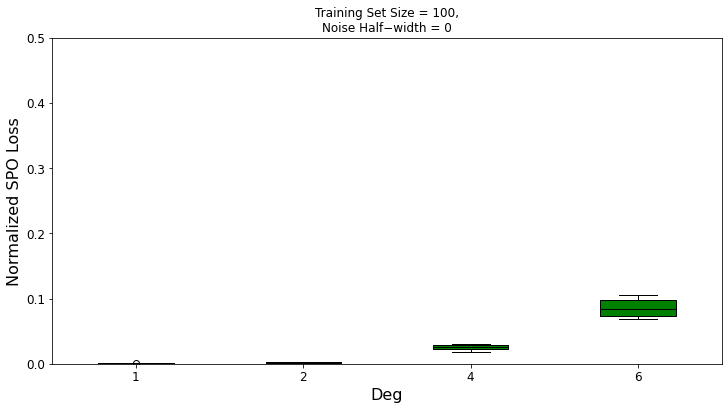

In [10]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df1_lr, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0')
plt.show()

In [11]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        weights, x, c = knapsack.genData(n+1000, p, m, deg=deg, noise_width=e, seed=i)
        c = - c
        # optmization model
        ks_model = knapsackModel(weights, cap)
        # two stage model
        rf_twostage = sklearnPred(rf, ks_model)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        ks_dataset_train = dataset.optDataset(ks_model, x_train, c_train)
        ks_dataset_test = dataset.optDataset(ks_model, x_test, c_test)
        # training
        rf_twostage.fit(ks_dataset_train.x, ks_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(ks_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = ks_dataset_test.c[j]
            z_true_i = ks_dataset_test.z[j,0]
            loss += calUnambSPO(ks_model, c_pred_i, c_true_i, z_true_i)
        loss /= abs(ks_dataset_test.z).sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df1_rf = df1_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 295.77it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.12it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.81it/s]


Normalized SPO Loss: 0.37%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.07it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.71it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.57it/s]


Normalized SPO Loss: 1.98%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 299.30it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 311.14it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.59it/s]


Normalized SPO Loss: 6.65%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 342.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.21it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.84it/s]


Normalized SPO Loss: 16.12%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 302.92it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 273.35it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.23it/s]


Normalized SPO Loss: 0.63%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 296.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.48it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.12it/s]


Normalized SPO Loss: 1.56%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 333.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.61it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.15it/s]


Normalized SPO Loss: 4.96%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.88it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.03it/s]


Normalized SPO Loss: 10.49%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 235.90it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 269.17it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.95it/s]


Normalized SPO Loss: 0.46%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 300.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.84it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.59it/s]


Normalized SPO Loss: 1.33%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.91it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.94it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.30it/s]


Normalized SPO Loss: 6.70%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 325.65it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 283.99it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.20it/s]


Normalized SPO Loss: 14.46%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 320.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.74it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.89it/s]


Normalized SPO Loss: 0.36%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 323.44it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.76it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.82it/s]


Normalized SPO Loss: 2.11%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 349.32it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.52it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.92it/s]


Normalized SPO Loss: 7.45%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.15it/s]


Normalized SPO Loss: 13.69%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 299.26it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.93it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.03it/s]


Normalized SPO Loss: 0.44%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 267.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.42it/s]


Normalized SPO Loss: 2.22%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 307.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.70it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.29it/s]


Normalized SPO Loss: 8.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 226.33it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 226.35it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.74it/s]


Normalized SPO Loss: 16.10%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 322.90it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.80it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.64it/s]


Normalized SPO Loss: 0.68%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 332.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.39it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.99it/s]


Normalized SPO Loss: 1.51%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.94it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.13it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.86it/s]


Normalized SPO Loss: 5.67%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.47it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.46it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.38it/s]


Normalized SPO Loss: 14.09%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.43it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 315.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.92it/s]


Normalized SPO Loss: 1.05%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 312.84it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.02it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.91it/s]


Normalized SPO Loss: 2.54%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 272.44it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 260.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.71it/s]


Normalized SPO Loss: 6.77%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 308.02it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 326.42it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.30it/s]


Normalized SPO Loss: 13.29%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 332.03it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.43it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.25it/s]


Normalized SPO Loss: 0.32%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 332.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.47it/s]


Normalized SPO Loss: 1.49%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.48it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 249.02it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.45it/s]


Normalized SPO Loss: 6.23%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 246.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.78it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.23it/s]


Normalized SPO Loss: 13.41%



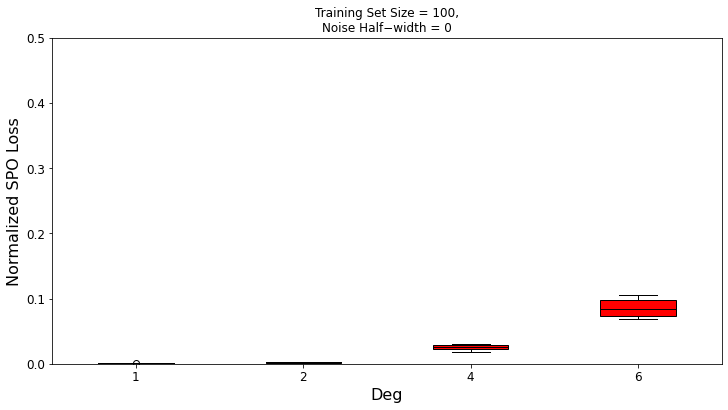

In [12]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df1_lr, boxprops=dict(facecolor='r', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0')
plt.show()

### Training Set Size = 100, Noise Half−width = 0.5 

In [13]:
# set up
n = 100 # number of data
p = 5 # size of feature
e = 0.5 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [14]:
# init DataFrame
df2_lr = pd.DataFrame(columns = degs)
df2_rf = pd.DataFrame(columns = degs)

In [15]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        weights, x, c = knapsack.genData(n+1000, p, m, deg=deg, noise_width=e, seed=i)
        c = - c
        # optmization model
        ks_model = knapsackModel(weights, cap)
        # two stage model
        lr_twostage = sklearnPred(lr, ks_model)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        ks_dataset_train = dataset.optDataset(ks_model, x_train, c_train)
        ks_dataset_test = dataset.optDataset(ks_model, x_test, c_test)
        # training
        lr_twostage.fit(ks_dataset_train.x, ks_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(ks_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = ks_dataset_test.c[j]
            z_true_i = ks_dataset_test.z[j,0]
            loss += calUnambSPO(ks_model, c_pred_i, c_true_i, z_true_i)
        loss /= abs(ks_dataset_test.z).sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df2_lr = df2_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 315.28it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 315.59it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.01it/s]


Normalized SPO Loss: 10.11%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 337.43it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.84it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.44it/s]


Normalized SPO Loss: 9.00%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 245.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 265.27it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.66it/s]


Normalized SPO Loss: 9.09%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.10it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.08it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 58.94it/s]


Normalized SPO Loss: 12.87%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 337.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 315.47it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.39it/s]


Normalized SPO Loss: 13.26%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 321.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.59it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.73it/s]


Normalized SPO Loss: 9.76%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.05it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.33it/s]


Normalized SPO Loss: 9.86%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 262.08it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 265.83it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.92it/s]


Normalized SPO Loss: 13.92%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 297.88it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.45it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:22<00:00, 45.41it/s]


Normalized SPO Loss: 11.70%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 253.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 228.92it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.65it/s]


Normalized SPO Loss: 10.42%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 318.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.23it/s]


Normalized SPO Loss: 11.71%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 337.59it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 271.45it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.24it/s]


Normalized SPO Loss: 17.19%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 296.16it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.78it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.69it/s]


Normalized SPO Loss: 11.66%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 315.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.63it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.46it/s]


Normalized SPO Loss: 10.29%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 320.30it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.08it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.75it/s]


Normalized SPO Loss: 9.54%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 305.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.60it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.28it/s]


Normalized SPO Loss: 13.14%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 263.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 267.34it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.10it/s]


Normalized SPO Loss: 11.03%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 331.49it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.26it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.37it/s]


Normalized SPO Loss: 10.31%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 291.41it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.02it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.21it/s]


Normalized SPO Loss: 10.33%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 275.55it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.74it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.72it/s]


Normalized SPO Loss: 13.96%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 329.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.87it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.88it/s]


Normalized SPO Loss: 11.90%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.96it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 262.10it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.14it/s]


Normalized SPO Loss: 9.52%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 265.26it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.79it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.11it/s]


Normalized SPO Loss: 10.13%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 261.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.80it/s]


Normalized SPO Loss: 14.27%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 283.24it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.27it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.48it/s]


Normalized SPO Loss: 15.35%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 260.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 294.87it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.66it/s]


Normalized SPO Loss: 11.60%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 273.19it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.37it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.24it/s]


Normalized SPO Loss: 10.93%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 331.98it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.70it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.77it/s]


Normalized SPO Loss: 16.22%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 323.44it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.10it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.54it/s]


Normalized SPO Loss: 10.69%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 315.36it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.58it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 58.89it/s]


Normalized SPO Loss: 8.99%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 331.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 311.08it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:20<00:00, 49.39it/s]


Normalized SPO Loss: 9.43%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 263.92it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.42it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.58it/s]


Normalized SPO Loss: 13.09%



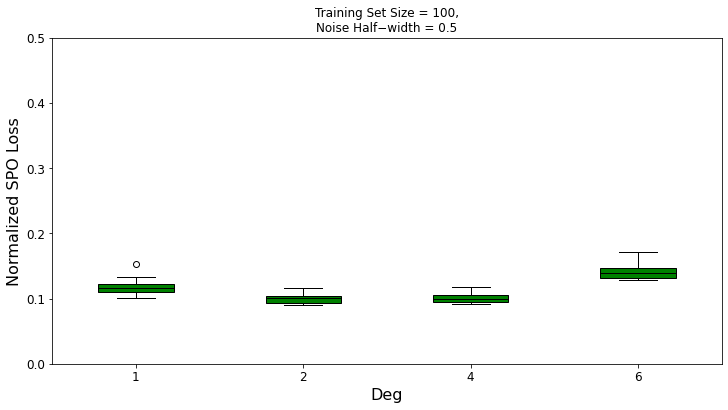

In [16]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df2_lr, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0.5')
plt.show()

In [17]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        weights, x, c = knapsack.genData(n+1000, p, m, deg=deg, noise_width=e, seed=i)
        c = - c
        # optmization model
        ks_model = knapsackModel(weights, cap)
        # two stage model
        rf_twostage = sklearnPred(rf, ks_model)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        ks_dataset_train = dataset.optDataset(ks_model, x_train, c_train)
        ks_dataset_test = dataset.optDataset(ks_model, x_test, c_test)
        # training
        rf_twostage.fit(ks_dataset_train.x, ks_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(ks_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = ks_dataset_test.c[j]
            z_true_i = ks_dataset_test.z[j,0]
            loss += calUnambSPO(ks_model, c_pred_i, c_true_i, z_true_i)
        loss /= abs(ks_dataset_test.z).sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df2_rf = df2_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 317.80it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.01it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.04it/s]


Normalized SPO Loss: 11.38%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 308.49it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.69it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.51it/s]


Normalized SPO Loss: 11.79%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 330.94it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.50it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 52.90it/s]


Normalized SPO Loss: 15.36%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 278.54it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.13it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.79it/s]


Normalized SPO Loss: 22.26%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 331.98it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.05it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.83it/s]


Normalized SPO Loss: 15.09%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 276.22it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.78it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.88it/s]


Normalized SPO Loss: 12.71%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 239.48it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 257.30it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.57it/s]


Normalized SPO Loss: 13.90%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 271.62it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.87it/s]


Normalized SPO Loss: 17.03%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 187.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.23it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.09it/s]


Normalized SPO Loss: 13.31%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 338.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.90it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 52.36it/s]


Normalized SPO Loss: 13.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 239.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.31it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.55it/s]


Normalized SPO Loss: 15.96%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.10it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.06it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.42it/s]


Normalized SPO Loss: 21.18%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 294.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.53it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.82it/s]


Normalized SPO Loss: 13.13%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 310.39it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 280.00it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.67it/s]


Normalized SPO Loss: 13.33%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 334.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.36it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 58.96it/s]


Normalized SPO Loss: 16.08%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 283.66it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 321.32it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.94it/s]


Normalized SPO Loss: 20.22%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 327.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 301.19it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 45.70it/s]


Normalized SPO Loss: 12.43%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 231.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 244.88it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.16it/s]


Normalized SPO Loss: 13.24%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 263.17it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.58it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.98it/s]


Normalized SPO Loss: 16.33%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 301.04it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.81it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.42it/s]


Normalized SPO Loss: 22.73%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 327.65it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 311.13it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.00it/s]


Normalized SPO Loss: 13.41%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 320.84it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.72it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 58.91it/s]


Normalized SPO Loss: 11.73%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 321.37it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.18it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.30it/s]


Normalized SPO Loss: 15.13%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 293.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.22it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.60it/s]


Normalized SPO Loss: 21.67%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 250.35it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 257.86it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.33it/s]


Normalized SPO Loss: 17.07%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 298.38it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.26it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.54it/s]


Normalized SPO Loss: 15.35%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 321.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 308.50it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.81it/s]


Normalized SPO Loss: 16.92%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 320.34it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.41it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 50.94it/s]


Normalized SPO Loss: 21.62%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 326.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 320.99it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.52it/s]


Normalized SPO Loss: 12.16%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 334.46it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.12it/s]


Normalized SPO Loss: 11.05%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 292.88it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.28it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.02it/s]


Normalized SPO Loss: 13.56%

Optimizing for optDataset...


100%|███████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 282.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 288.46it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.74it/s]


Normalized SPO Loss: 19.70%



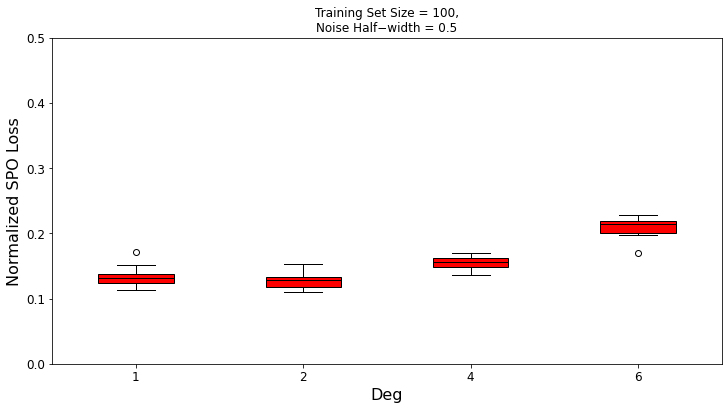

In [18]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df2_rf, boxprops=dict(facecolor='r', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 100,\nNoise Half−width = 0.5')
plt.show()

### Training Set Size = 1000, Noise Half−width = 0

In [19]:
# set up
n = 1000 # number of data
p = 5 # size of feature
e = 0 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [20]:
# init DataFrame
df3_lr = pd.DataFrame(columns = degs)
df3_rf = pd.DataFrame(columns = degs)

In [21]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        weights, x, c = knapsack.genData(n+1000, p, m, deg=deg, noise_width=e, seed=i)
        c = - c
        # optmization model
        ks_model = knapsackModel(weights, cap)
        # two stage model
        lr_twostage = sklearnPred(lr, ks_model)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        ks_dataset_train = dataset.optDataset(ks_model, x_train, c_train)
        ks_dataset_test = dataset.optDataset(ks_model, x_test, c_test)
        # training
        lr_twostage.fit(ks_dataset_train.x, ks_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(ks_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = ks_dataset_test.c[j]
            z_true_i = ks_dataset_test.z[j,0]
            loss += calUnambSPO(ks_model, c_pred_i, c_true_i, z_true_i)
        loss /= abs(ks_dataset_test.z).sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df3_lr = df3_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 305.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.81it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.14it/s]


Normalized SPO Loss: 0.02%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 288.87it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 311.68it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.26it/s]


Normalized SPO Loss: 0.22%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.21it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.09it/s]


Normalized SPO Loss: 2.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.35it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.71it/s]


Normalized SPO Loss: 6.48%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.70it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.32it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 58.92it/s]


Normalized SPO Loss: 0.02%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.16it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.21it/s]


Normalized SPO Loss: 0.14%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.26it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.78it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.99it/s]


Normalized SPO Loss: 2.43%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.68it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.68it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.33it/s]


Normalized SPO Loss: 6.77%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 283.48it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.36it/s]


Normalized SPO Loss: 0.05%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.51it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.81it/s]


Normalized SPO Loss: 0.17%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.89it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.59it/s]


Normalized SPO Loss: 2.27%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.99it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.21it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.07it/s]


Normalized SPO Loss: 8.22%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.43it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.08it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.70it/s]


Normalized SPO Loss: 0.02%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.86it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.72it/s]


Normalized SPO Loss: 0.15%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.24it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 290.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.17it/s]


Normalized SPO Loss: 1.87%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.71it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.33it/s]


Normalized SPO Loss: 4.89%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.43it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.92it/s]


Normalized SPO Loss: 0.04%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.90it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.67it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.74it/s]


Normalized SPO Loss: 0.30%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.31it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.00it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 55.91it/s]


Normalized SPO Loss: 2.20%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.66it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.00it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.97it/s]


Normalized SPO Loss: 6.66%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.51it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.86it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.29it/s]


Normalized SPO Loss: 0.01%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 333.22it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.38it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.04it/s]


Normalized SPO Loss: 0.12%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.08it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.50it/s]


Normalized SPO Loss: 2.02%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.53it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.50it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.23it/s]


Normalized SPO Loss: 6.58%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.19it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.83it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.46it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.50it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.74it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 62.97it/s]


Normalized SPO Loss: 0.15%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.23it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.56it/s]


Normalized SPO Loss: 2.12%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.86it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.23it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.63it/s]


Normalized SPO Loss: 6.70%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 285.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.24it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.68it/s]


Normalized SPO Loss: 0.00%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.71it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.05it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.05it/s]


Normalized SPO Loss: 0.19%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.82it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.53it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.32it/s]


Normalized SPO Loss: 2.30%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.21it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.28it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.53it/s]


Normalized SPO Loss: 6.68%



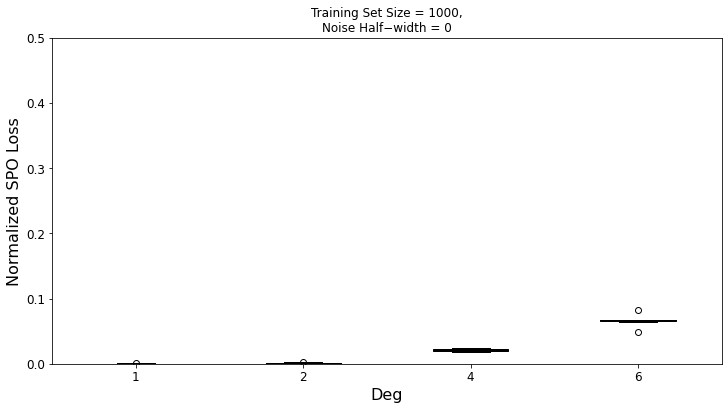

In [22]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df3_lr, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0')
plt.show()

In [23]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        weights, x, c = knapsack.genData(n+1000, p, m, deg=deg, noise_width=e, seed=i)
        c = - c
        # optmization model
        ks_model = knapsackModel(weights, cap)
        # two stage model
        rf_twostage = sklearnPred(rf, ks_model)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        ks_dataset_train = dataset.optDataset(ks_model, x_train, c_train)
        ks_dataset_test = dataset.optDataset(ks_model, x_test, c_test)
        # training
        rf_twostage.fit(ks_dataset_train.x, ks_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(ks_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = ks_dataset_test.c[j]
            z_true_i = ks_dataset_test.z[j,0]
            loss += calUnambSPO(ks_model, c_pred_i, c_true_i, z_true_i)
        loss /= abs(ks_dataset_test.z).sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df3_rf = df3_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.57it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.48it/s]


Normalized SPO Loss: 0.13%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 373.99it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.82it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.86it/s]


Normalized SPO Loss: 0.46%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.14it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.74it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.94it/s]


Normalized SPO Loss: 1.47%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 278.06it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 245.99it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.32it/s]


Normalized SPO Loss: 4.96%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.58it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.43it/s]


Normalized SPO Loss: 0.14%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 324.91it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.07it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.60it/s]


Normalized SPO Loss: 0.34%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 281.81it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 290.71it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.82it/s]


Normalized SPO Loss: 0.88%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.00it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.83it/s]


Normalized SPO Loss: 1.76%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.78it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.79it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.47it/s]


Normalized SPO Loss: 0.07%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 306.91it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.09it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.46it/s]


Normalized SPO Loss: 0.36%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.20it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.01it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.13it/s]


Normalized SPO Loss: 1.23%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.65it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.70it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.51it/s]


Normalized SPO Loss: 3.32%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.21it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.73it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.34it/s]


Normalized SPO Loss: 0.07%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.46it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.68it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.62it/s]


Normalized SPO Loss: 0.52%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.52it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.90it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.86it/s]


Normalized SPO Loss: 1.59%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 345.99it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.03it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.59it/s]


Normalized SPO Loss: 3.51%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 347.54it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.91it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 69.99it/s]


Normalized SPO Loss: 0.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.01it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.12it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.41it/s]


Normalized SPO Loss: 0.49%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.55it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.89it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.72it/s]


Normalized SPO Loss: 1.31%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 339.66it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.17it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.76it/s]


Normalized SPO Loss: 2.90%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.81it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.73it/s]


Normalized SPO Loss: 0.16%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.24it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.37it/s]


Normalized SPO Loss: 0.46%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.11it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 344.09it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.29it/s]


Normalized SPO Loss: 1.23%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.65it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 311.00it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.17it/s]


Normalized SPO Loss: 3.35%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 342.21it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.00it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.64it/s]


Normalized SPO Loss: 0.29%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.22it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.30it/s]


Normalized SPO Loss: 0.54%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 290.29it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 298.42it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.99it/s]


Normalized SPO Loss: 1.39%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.35it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.27it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.39it/s]


Normalized SPO Loss: 3.54%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.68it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.62it/s]


Normalized SPO Loss: 0.08%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.67it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 310.91it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.42it/s]


Normalized SPO Loss: 0.35%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.39it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 356.95it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.83it/s]


Normalized SPO Loss: 0.99%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 348.65it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 366.09it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.87it/s]


Normalized SPO Loss: 2.41%



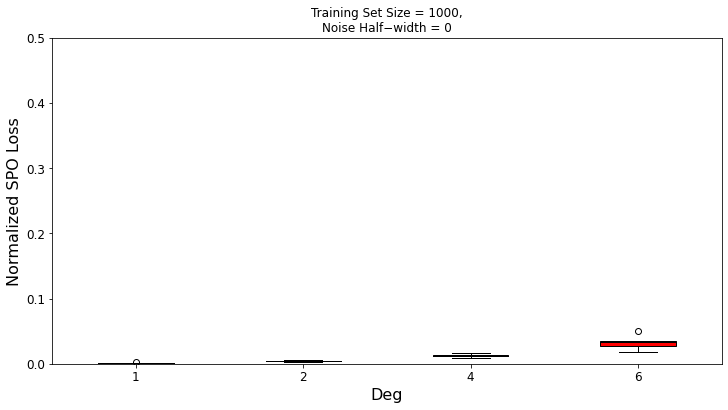

In [24]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df3_rf, boxprops=dict(facecolor='r', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0')
plt.show()

### Training Set Size = 1000, Noise Half−width = 0.5

In [25]:
# set up
n = 1000 # number of data
p = 5 # size of feature
e = 0.5 # noise half−width
degs = [1, 2, 4, 6] # list of param deg

In [26]:
# init DataFrame
df4_lr = pd.DataFrame(columns = degs)
df4_rf = pd.DataFrame(columns = degs)

In [27]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        weights, x, c = knapsack.genData(n+1000, p, m, deg=deg, noise_width=e, seed=i)
        c = - c
        # optmization model
        ks_model = knapsackModel(weights, cap)
        # two stage model
        lr_twostage = sklearnPred(lr, ks_model)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        ks_dataset_train = dataset.optDataset(ks_model, x_train, c_train)
        ks_dataset_test = dataset.optDataset(ks_model, x_test, c_test)
        # training
        lr_twostage.fit(ks_dataset_train.x, ks_dataset_train.c)
        # prediction
        c_test_pred = lr_twostage.predict(ks_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = ks_dataset_test.c[j]
            z_true_i = ks_dataset_test.z[j,0]
            loss += calUnambSPO(ks_model, c_pred_i, c_true_i, z_true_i)
        loss /= abs(ks_dataset_test.z).sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df4_lr = df4_lr.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.33it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.55it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.19it/s]


Normalized SPO Loss: 9.83%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.34it/s]


Normalized SPO Loss: 8.60%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 353.92it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.43it/s]


Normalized SPO Loss: 8.70%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 355.35it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.80it/s]


Normalized SPO Loss: 11.77%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 367.95it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.88it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.77it/s]


Normalized SPO Loss: 12.29%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.50it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 363.75it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.68it/s]


Normalized SPO Loss: 9.17%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 352.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 361.58it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 66.69it/s]


Normalized SPO Loss: 8.86%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.76it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.69it/s]


Normalized SPO Loss: 11.47%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.59it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.15it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.61it/s]


Normalized SPO Loss: 10.94%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.48it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.37it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.81it/s]


Normalized SPO Loss: 10.10%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 358.09it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 374.69it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.30it/s]


Normalized SPO Loss: 10.06%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.61it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 362.32it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 68.46it/s]


Normalized SPO Loss: 13.92%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 367.10it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 341.16it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 73.91it/s]


Normalized SPO Loss: 10.61%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 359.12it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.41it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 67.58it/s]


Normalized SPO Loss: 9.45%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.74it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 333.55it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.28it/s]


Normalized SPO Loss: 8.79%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.45it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 357.79it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 71.05it/s]


Normalized SPO Loss: 10.48%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 360.51it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 364.42it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 72.14it/s]


Normalized SPO Loss: 10.50%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:05<00:00, 188.39it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 273.23it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.58it/s]


Normalized SPO Loss: 9.64%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 291.97it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 293.82it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.16it/s]


Normalized SPO Loss: 9.35%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 277.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 291.20it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.36it/s]


Normalized SPO Loss: 11.89%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 295.42it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.16it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.37it/s]


Normalized SPO Loss: 10.82%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:04<00:00, 236.13it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 256.00it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.08it/s]


Normalized SPO Loss: 8.59%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 307.88it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.70it/s]


Normalized SPO Loss: 8.93%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.56it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 346.38it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.07it/s]


Normalized SPO Loss: 11.61%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.81it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 323.54it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.48it/s]


Normalized SPO Loss: 13.73%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 315.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.47it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.19it/s]


Normalized SPO Loss: 10.67%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.57it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 302.03it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.71it/s]


Normalized SPO Loss: 9.76%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 326.56it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.76it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.17it/s]


Normalized SPO Loss: 12.20%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.89it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.90it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:14<00:00, 70.24it/s]


Normalized SPO Loss: 10.15%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.25it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.28it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 63.15it/s]


Normalized SPO Loss: 8.61%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.00it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.64it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.82it/s]


Normalized SPO Loss: 8.97%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 301.79it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.77it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.06it/s]


Normalized SPO Loss: 11.93%



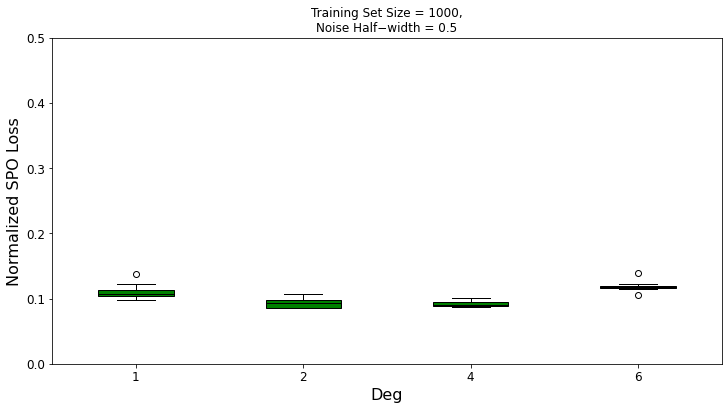

In [28]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df4_lr, boxprops=dict(facecolor='g', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0.5')
plt.show()

In [29]:
for i in range(8):
    row = {}
    for deg in degs:
        # generate data
        weights, x, c = knapsack.genData(n+1000, p, m, deg=deg, noise_width=e, seed=i)
        c = - c
        # optmization model
        ks_model = knapsackModel(weights, cap)
        # two stage model
        rf_twostage = sklearnPred(rf, ks_model)
        # data split
        x_train, x_test, c_train, c_test = train_test_split(x, c, test_size=1000, random_state=i)
        # build data set
        ks_dataset_train = dataset.optDataset(ks_model, x_train, c_train)
        ks_dataset_test = dataset.optDataset(ks_model, x_test, c_test)
        # training
        rf_twostage.fit(ks_dataset_train.x, ks_dataset_train.c)
        # prediction
        c_test_pred = rf_twostage.predict(ks_dataset_test.x)
        # eval
        loss = 0
        print('Evaluate....')
        time.sleep(1)
        for j in tqdm(range(1000)):
            c_pred_i = c_test_pred[j]
            c_true_i = ks_dataset_test.c[j]
            z_true_i = ks_dataset_test.z[j,0]
            loss += calUnambSPO(ks_model, c_pred_i, c_true_i, z_true_i)
        loss /= abs(ks_dataset_test.z).sum()
        time.sleep(1)
        print('Normalized SPO Loss: {:.2f}%'.format(loss * 100))
        row[deg] = loss
        print()
    df4_rf = df4_rf.append(row, ignore_index = True)

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 338.32it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 336.79it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 65.04it/s]


Normalized SPO Loss: 10.83%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.46it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.29it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.34it/s]


Normalized SPO Loss: 10.04%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 314.48it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.89it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.02it/s]


Normalized SPO Loss: 9.29%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.24it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.06it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.08it/s]


Normalized SPO Loss: 11.23%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.91it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 334.90it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 53.80it/s]


Normalized SPO Loss: 13.60%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 303.38it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.02it/s]


Normalized SPO Loss: 10.56%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 354.60it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 57.63it/s]


Normalized SPO Loss: 8.53%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.93it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.27it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.57it/s]


Normalized SPO Loss: 7.58%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 337.48it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.57it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.06it/s]


Normalized SPO Loss: 12.13%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.43it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.26it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.14it/s]


Normalized SPO Loss: 11.22%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.25it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 343.24it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:19<00:00, 51.84it/s]


Normalized SPO Loss: 10.30%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 268.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 300.15it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.98it/s]


Normalized SPO Loss: 10.90%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.03it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.33it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 66.25it/s]


Normalized SPO Loss: 11.50%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.22it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 340.30it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.35it/s]


Normalized SPO Loss: 10.90%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.11it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.10it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.35it/s]


Normalized SPO Loss: 9.59%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 350.52it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 349.26it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:21<00:00, 46.18it/s]


Normalized SPO Loss: 9.45%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 273.36it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 311.17it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.87it/s]


Normalized SPO Loss: 11.43%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.94it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 292.62it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.35it/s]


Normalized SPO Loss: 11.17%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 313.73it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 309.04it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.40it/s]


Normalized SPO Loss: 9.51%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:02<00:00, 335.66it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.40it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 59.70it/s]


Normalized SPO Loss: 9.43%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 333.33it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.77it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.64it/s]


Normalized SPO Loss: 12.24%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 327.64it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 332.52it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 55.25it/s]


Normalized SPO Loss: 10.09%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 262.83it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 275.49it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.73it/s]


Normalized SPO Loss: 9.35%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 294.05it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 304.69it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.00it/s]


Normalized SPO Loss: 10.40%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.60it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 296.93it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 56.22it/s]


Normalized SPO Loss: 15.33%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 324.91it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 328.18it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.98it/s]


Normalized SPO Loss: 12.06%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 317.58it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.56it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.26it/s]


Normalized SPO Loss: 10.73%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 329.32it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 299.38it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.87it/s]


Normalized SPO Loss: 11.40%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 316.63it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 322.13it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:15<00:00, 64.57it/s]


Normalized SPO Loss: 11.21%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 326.56it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 331.83it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:18<00:00, 54.16it/s]


Normalized SPO Loss: 9.59%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 318.51it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 312.70it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:17<00:00, 58.16it/s]


Normalized SPO Loss: 8.72%

Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 319.82it/s]


Optimizing for optDataset...


100%|█████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 330.05it/s]


Evaluate....


100%|██████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.08it/s]


Normalized SPO Loss: 8.79%



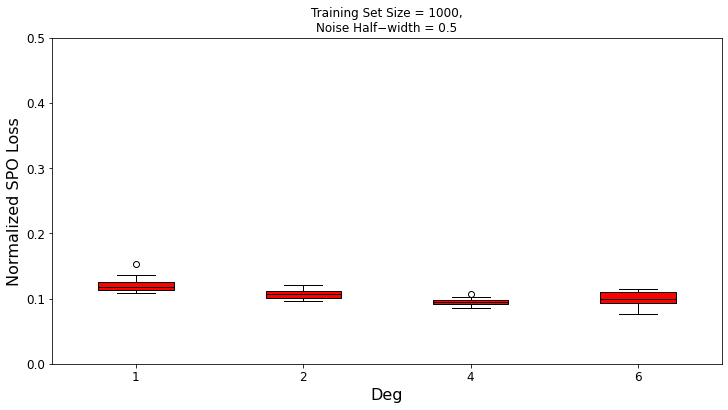

In [30]:
# draw boxplot
plt.figure(figsize=(12,6))
plt.boxplot(df4_rf, boxprops=dict(facecolor='r', color='k'), medianprops=dict(color='k'), patch_artist=True)
plt.xlabel('Deg', fontsize=16)
plt.xticks(ticks=[1,2,3,4], labels=[1,2,4,6], fontsize=12)
plt.ylabel('Normalized SPO Loss', fontsize=16)
plt.yticks(fontsize=12)
plt.ylim(0, 0.5)
plt.title('Training Set Size = 1000,\nNoise Half−width = 0.5')
plt.show()

## Save File 

In [31]:
df1_lr.to_csv('./res/ks/lr_n100.csv', index=False)
df1_rf.to_csv('./res/ks/rf_n100.csv', index=False)
df2_lr.to_csv('./res/ks/lr_n100_noise.csv', index=False)
df2_rf.to_csv('./res/ks/rf_n100_noise.csv', index=False)
df3_lr.to_csv('./res/ks/lr_n1000.csv', index=False)
df3_rf.to_csv('./res/ks/rf_n1000.csv', index=False)
df4_lr.to_csv('./res/ks/lr_n1000_noise.csv', index=False)
df4_rf.to_csv('./res/ks/rf_n1000_noise.csv', index=False)